### Kabir and Wisdom's Section: Initial Dataset Exploration, Linear Regression (Done with Wisdom), Neural Network

### Initial Dataset Exploration

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Examining dataset
weather_df = pd.read_csv("seattle-weather.csv")
weather_df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [2]:
#Checking for null values
null_values = weather_df.isnull().sum()
print(f"Null Values :\n{null_values} ")

Null Values :
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64 


In [3]:
#Checking dimensions
print(weather_df.shape)

(1461, 6)


In [4]:
#Checking data types
print(weather_df.dtypes)

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [5]:
#All data barring date and weather are numeric. For weather, we will categorize to make it numeric. For date, we will extract
#date, month, and year, and have them as numeric values in respective columns.

#Checking descriptive statistics
print(weather_df.describe())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


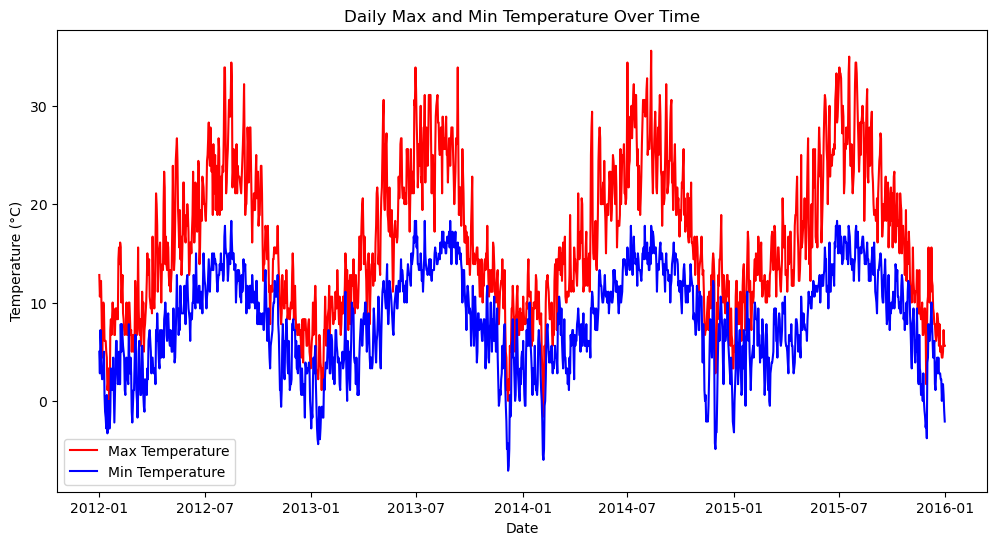

In [6]:

# Convert date column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Set the date as the index for time series plots
weather_df.set_index('date', inplace=True)

# Plot for Max and Min Temp over time
plt.figure(figsize=(12, 6))
plt.plot(weather_df.index, weather_df['temp_max'], label='Max Temperature', color='red')
plt.plot(weather_df.index, weather_df['temp_min'], label='Min Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Max and Min Temperature Over Time')
plt.legend()
plt.show()

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_78262/3214149700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_df['month'], y=weather_df['temp_max'], palette='coolwarm')


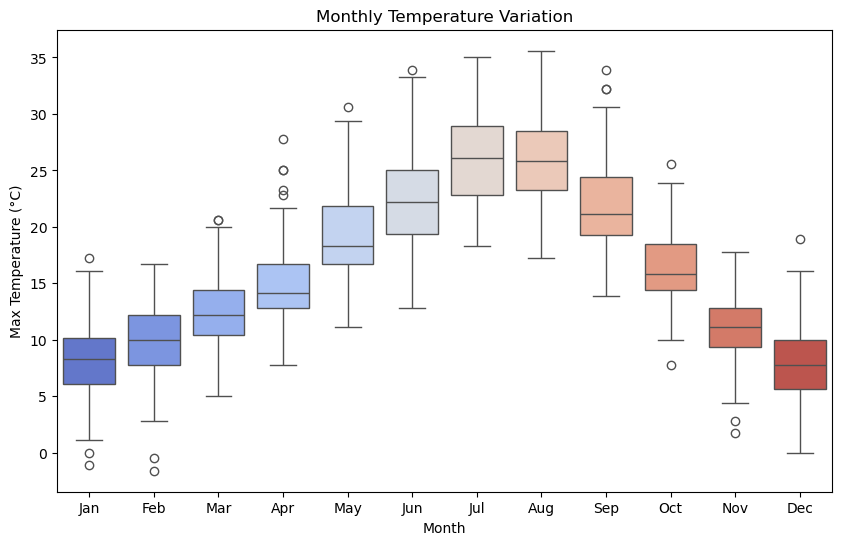

In [7]:
weather_df['month'] = weather_df.index.month
plt.figure(figsize=(10, 6))
sns.boxplot(x=weather_df['month'], y=weather_df['temp_max'], palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Max Temperature (°C)')
plt.title('Monthly Temperature Variation')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_78262/3852600336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=weather_df['weather'], order=weather_df['weather'].value_counts().index, palette='viridis')


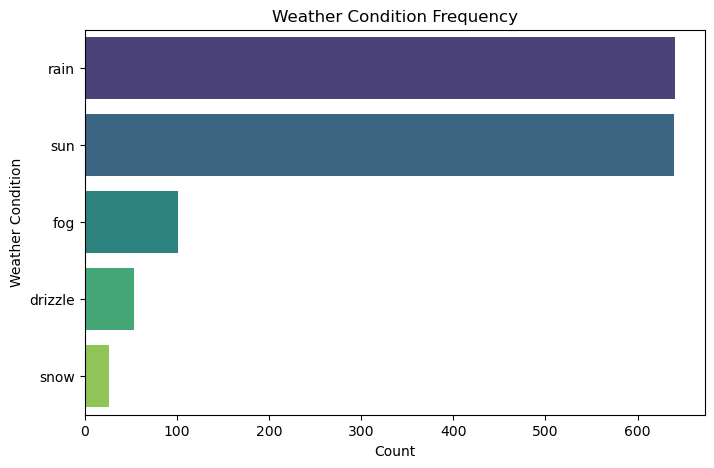

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(y=weather_df['weather'], order=weather_df['weather'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.title('Weather Condition Frequency')
plt.show()

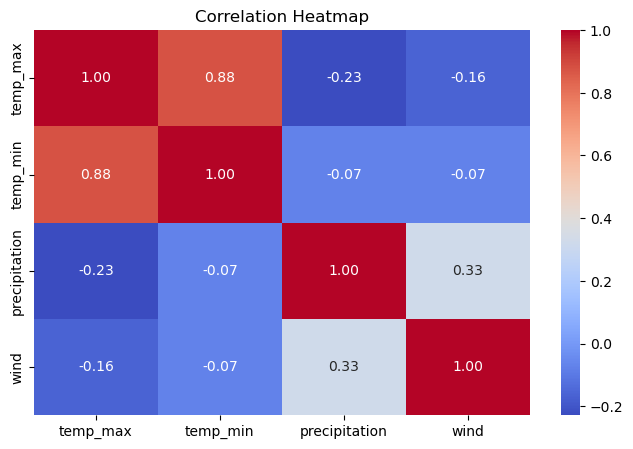

In [9]:
plt.figure(figsize=(8, 5))
sns.heatmap(weather_df[['temp_max', 'temp_min', 'precipitation', 'wind']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Machine Learning Preprocessing Done by Wisdom and Kabir

In [10]:

pp_weather_df = weather_df.copy()

pp_weather_df['year'] = pp_weather_df.index.year
pp_weather_df['month'] = pp_weather_df.index.month
pp_weather_df['day'] = pp_weather_df.index.day
pp_weather_df['day_of_week'] = pp_weather_df.index.dayofweek

pp_weather_df = pd.get_dummies(pp_weather_df, columns=['weather'], prefix='weather')
weather_columns = ['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']
pp_weather_df[weather_columns] = pp_weather_df[weather_columns].astype(int)

output_file = "pp_weather.csv"
pp_weather_df.to_csv(output_file, index=False)

pp_weather_df.head()


,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "pp_weather.csv"
pp_weather_df = pd.read_csv(file_path)

X = pp_weather_df.drop(columns=['temp_max'])  # Features
y = pp_weather_df['temp_max']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Results
print("=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2393
Root Mean Squared Error (RMSE): 2.8704
R² Score: 0.8552


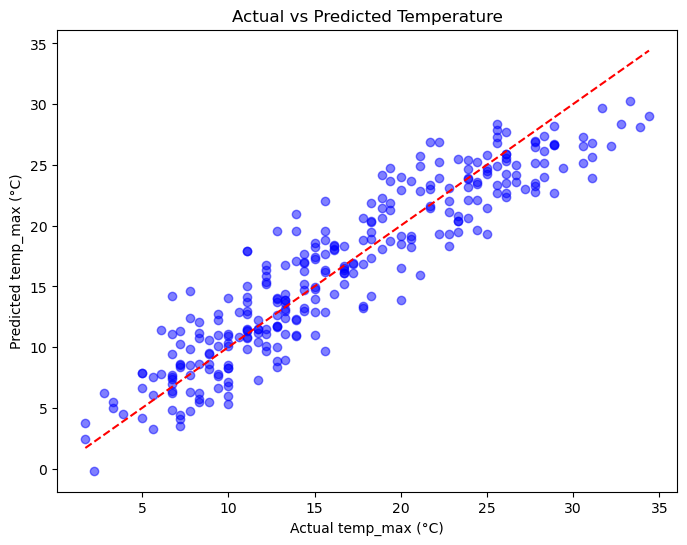

In [12]:
# Scatter Plot: Actual vs Predicted Temperature
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Ideal Fit Line
plt.xlabel("Actual temp_max (°C)")
plt.ylabel("Predicted temp_max (°C)")
plt.title("Actual vs Predicted Temperature")
plt.show()

=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2393
Root Mean Squared Error (RMSE): 2.8704
Mean Absolute Error (MAE): 2.3222
R² Score: 0.8552


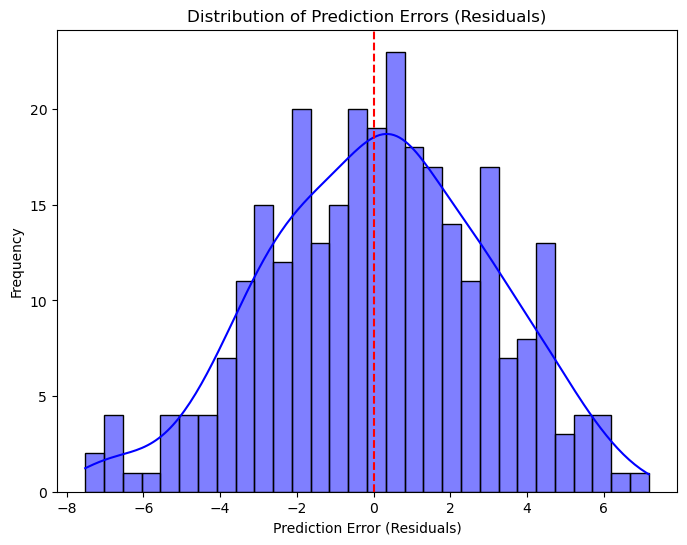

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")  # Reference line at 0 error
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.show()


### Determining Feature importance

In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression, mutual_info_regression

file_path = "pp_weather.csv"
pp_weather_df = pd.read_csv(file_path)

X = pp_weather_df.drop(columns=['temp_max'])  # Features
y = pp_weather_df['temp_max']  # Target

f_scores, _ = f_regression(X, y)
mi_scores = mutual_info_regression(X, y)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'Mutual Information': mi_scores
}).sort_values(by='F-Score', ascending=False)

print(feature_importance_df)


            Feature      F-Score  Mutual Information
1          temp_min  4798.160272            0.831821
11      weather_sun   297.096492            0.098707
9      weather_rain   216.053702            0.134499
0     precipitation    80.414883            0.121460
10     weather_snow    60.204482            0.052317
2              wind    40.760044            0.048664
3             month    35.535733            0.670281
4              year    18.701868            0.027157
5               day     2.382406            0.000000
7   weather_drizzle     0.267443            0.005579
8       weather_fog     0.203442            0.023287
6       day_of_week     0.016577            0.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

selected_features = ['temp_min', 'weather_sun', 'weather_rain', 'precipitation', 'weather_snow', 'wind', 'month']
X_selected = pp_weather_df[selected_features]
y = pp_weather_df['temp_max']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

linreg_optimized = LinearRegression()
linreg_optimized.fit(X_train, y_train)

y_pred_optimized = linreg_optimized.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

improved_results = {
    "Mean Squared Error (MSE)": mse_optimized,
    "Root Mean Squared Error (RMSE)": rmse_optimized,
    "Mean Absolute Error (MAE)": mae_optimized,
    "R² Score": r2_optimized
}


In [17]:
print("=== Optimized Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"R² Score: {r2_optimized:.4f}")


=== Optimized Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2455
Root Mean Squared Error (RMSE): 2.8715
Mean Absolute Error (MAE): 2.3287
R² Score: 0.8551


### Neural Network done by Kabir

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric columns
scaler = MinMaxScaler()
numeric_cols = ["precipitation", "temp_max", "temp_min", "wind"]
pp_weather_df[numeric_cols] = scaler.fit_transform(pp_weather_df[numeric_cols])

print(pp_weather_df.head())
# Check if normalization was successful
normalized_check_after = (pp_weather_df[numeric_cols].max() <= 1).all()
normalized_check_after


   precipitation  temp_max  temp_min      wind  month  year  day  day_of_week  \
0       0.000000  0.387097  0.476378  0.472527      1  2012    1            6   
1       0.194991  0.327957  0.389764  0.450549      1  2012    2            0   
2       0.014311  0.357527  0.562992  0.208791      1  2012    3            1   
3       0.363148  0.370968  0.500000  0.472527      1  2012    4            2   
4       0.023256  0.282258  0.389764  0.626374      1  2012    5            3   

   weather_drizzle  weather_fog  weather_rain  weather_snow  weather_sun  
0                1            0             0             0            0  
1                0            0             1             0            0  
2                0            0             1             0            0  
3                0            0             1             0            0  
4                0            0             1             0            0  


True

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner as kt

# Prepare dataset for training
X = pp_weather_df.drop(columns=["temp_max"])  # Features
y = pp_weather_df["temp_max"]  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2025-03-03 13:32:51.402844: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
#Models not saved as kt_tuning generated 254, and they were too many to successfully upload to github. the best model was saved and used. 
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    activation = hp.Choice('activation', ['relu', 'tanh'])

    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=16, max_value=128, step=16),
        activation=activation,
        input_shape=(X_train.shape[1],)  # Adjusted to match feature count dynamically
    ))

    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=activation
        ))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

    nn_model.compile(loss="mse", optimizer='adam', metrics=["mae"])

    return nn_model

tuner = kt.Hyperband(
    create_model,
    objective='val_mae',  # Mean Absolute Error for regression
    max_epochs=100,
    factor=3,
    directory='kt_tuning',
    project_name='temp_max_prediction'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)



Trial 254 Complete [00h 00m 24s]
val_mae: 0.17033889889717102

Best val_mae So Far: 0.11708018183708191
Total elapsed time: 00h 23m 44s


In [28]:
tuner.results_summary()


Results summary
Results in kt_tuning/temp_max_prediction
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 0245 summary
Hyperparameters:
activation: relu
first_units: 112
num_layers: 1
units_0: 48
units_1: 128
units_2: 112
units_3: 80
units_4: 16
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0243
Score: 0.11708018183708191

Trial 0251 summary
Hyperparameters:
activation: relu
first_units: 96
num_layers: 2
units_0: 32
units_1: 80
units_2: 96
units_3: 112
units_4: 16
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.13517042994499207

Trial 0246 summary
Hyperparameters:
activation: relu
first_units: 32
num_layers: 2
units_0: 64
units_1: 64
units_2: 96
units_3: 16
units_4: 16
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0239
Score: 0.14505358040332794

Trial 0243 summary
Hyperparameters:
activation: relu
first_units: 112
num_layers: 1
units_0: 48


In [30]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9126.4004 - mae: 75.4850 - val_loss: 350.7493 - val_mae: 18.7261
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.7918 - mae: 8.9266 - val_loss: 1.0878 - val_mae: 1.0060
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7243 - mae: 1.4198 - val_loss: 0.1379 - val_mae: 0.2881
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1438 - mae: 0.2986 - val_loss: 0.0903 - val_mae: 0.2518
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0739 - mae: 0.2137 - val_loss: 0.0726 - val_mae: 0.2127
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0671 - mae: 0.2008 - val_loss: 0.0728 - val_mae: 0.2105
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0709 - mae: 0.2091 - val_loss: 0.0703 - val_mae: 0.2081
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0671 - mae: 0.2031 - val_loss: 0.0683 - val_mae: 0.2069
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 -

In [31]:
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.3f}")


Test MAE: 0.118


In [40]:
predictions = best_model.predict(X_test)

temp_max_min = weather_df["temp_max"].min()
temp_max_max = weather_df["temp_max"].max()

predictions_real = predictions * (temp_max_max - temp_max_min) + temp_max_min
y_test_real = y_test * (temp_max_max - temp_max_min) + temp_max_min  # True values also denormalized

y_test_real = np.array(y_test_real)  # Convert Series to NumPy array
predictions_real = np.array(predictions_real)  # Convert to NumPy array

comparison_df = pd.DataFrame({
    "Actual Temp Max": y_test_real.flatten(),
    "Predicted Temp Max": predictions_real.flatten()
})

print(comparison_df.head(10)) 


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
   Actual Temp Max  Predicted Temp Max
0             23.9           18.823368
1              7.8            9.438650
2              9.4           10.278454
3             26.7           18.829470
4             13.3           13.205139
5             21.7           13.881183
6             28.3           15.306635
7             15.0           15.128826
8             13.9           12.955383
9             25.0           18.538561


In [41]:
print(temp_max_min)
print(temp_max_max)

-1.6
35.6


In [52]:
denormalized_mae = test_mae*(temp_max_max - temp_max_min)
print(f"Test MAE in Celsius: {denormalized_mae:.3f}")

Test MAE in Celsius: 4.374


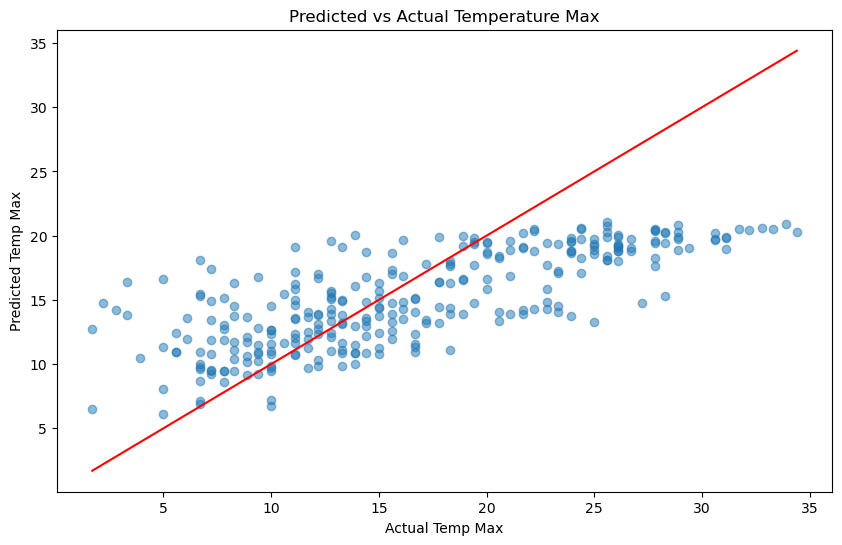

In [42]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, predictions_real, alpha=0.5)
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], color='red')  # Ideal line
plt.xlabel("Actual Temp Max")
plt.ylabel("Predicted Temp Max")
plt.title("Predicted vs Actual Temperature Max")
plt.show()


In [43]:
best_model.save("best_temp_max_model.h5")


### Gita's Section


## Analysis

### Trends Analysis:

#### Average precipitation, temperature, and wind speed for different weather conditions.
#### Identifying days with extreme weather conditions (highest precipitation, coldest temperatures, highest wind speeds).
#### Calculating moving averages for temperature trends to smooth fluctuations.


### Weather Impact Analysis:

#### Does higher wind speed correlate with snow or rain?
#### Are sunny days consistently warmer than rainy/snowy days?
#### Does precipitation tend to be higher on certain days of the week?


### Extreme Events Identification:

#### Hottest and coldest days within the dataset.
#### Days with highest and lowest precipitation levels.
#### Windy days classification (e.g., wind speed >5 m/s as high wind days).





### Statistical Analysis


In [1]:
#import depedencies
import os
import pandas as pd
from pathlib import Path
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
#define the file path
weather_seattle = Path("seattle-weather.csv")

In [3]:
#read the file
weather_seattle_df = pd.read_csv(weather_seattle)
weather_seattle_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
#check the columns
print(weather_seattle_df.columns)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [5]:
#get the data info
weather_seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
#to find total unique value for each column
weather_seattle_df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [7]:
#descriptive statistic
weather_seattle_df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
# Correlation matrix
correlation_matrix = weather_seattle_df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
correlation_matrix

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


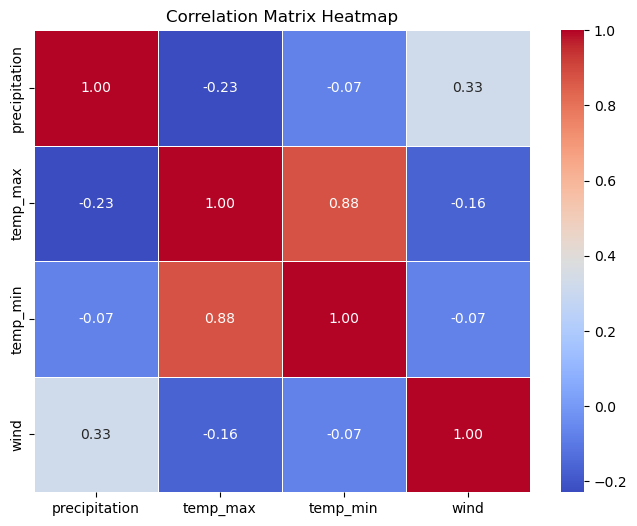

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Correlation Values:

Close to 1: Strong positive correlation.

Close to -1: Strong negative correlation.

Close to 0: No correlation.

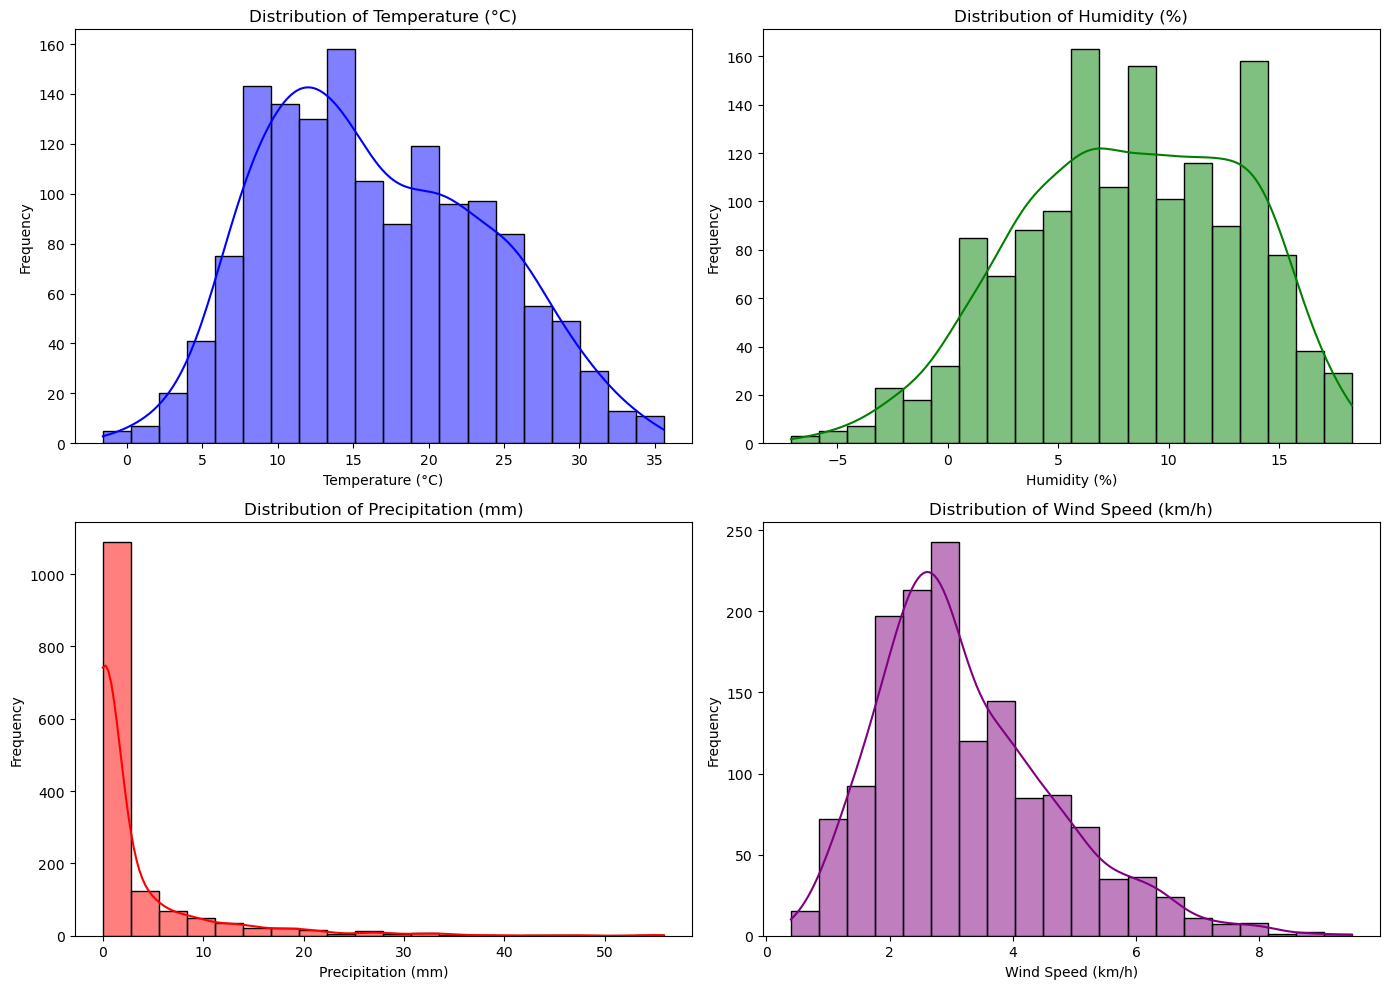

In [10]:
# Histogram for each numerical variable distribution

# Set up matplotlib figure for subplots
plt.figure(figsize=(14, 10))

# Histogram for Temperature
plt.subplot(2, 2, 1)
sns.histplot(weather_seattle_df['temp_max'], bins=20, kde=True, color='blue')
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for Humidity (New York dataset)
plt.subplot(2, 2, 2)
sns.histplot(weather_seattle_df['temp_min'], bins=20, kde=True, color='green')
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

# Histogram for Precipitation (New York dataset)
plt.subplot(2, 2, 3)
sns.histplot(weather_seattle_df['precipitation'], bins=20, kde=True, color='red')
plt.title('Distribution of Precipitation (mm)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')

# Histogram for Wind Speed (New York dataset)
plt.subplot(2, 2, 4)
sns.histplot(weather_seattle_df['wind'], bins=20, kde=True, color='purple')
plt.title('Distribution of Wind Speed (km/h)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Weather Condition Analysis

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_88810/680361423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=weather_seattle_df['weather'], order=weather_seattle_df['weather'].value_counts().index, palette="coolwarm")


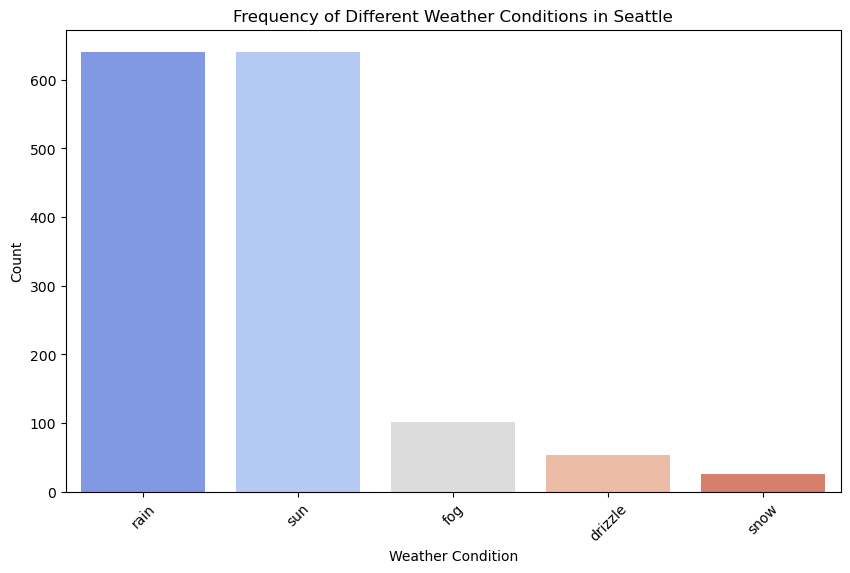

In [11]:
# Frequency of Weather Conditions (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x=weather_seattle_df['weather'], order=weather_seattle_df['weather'].value_counts().index, palette="coolwarm")
plt.title("Frequency of Different Weather Conditions in Seattle")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


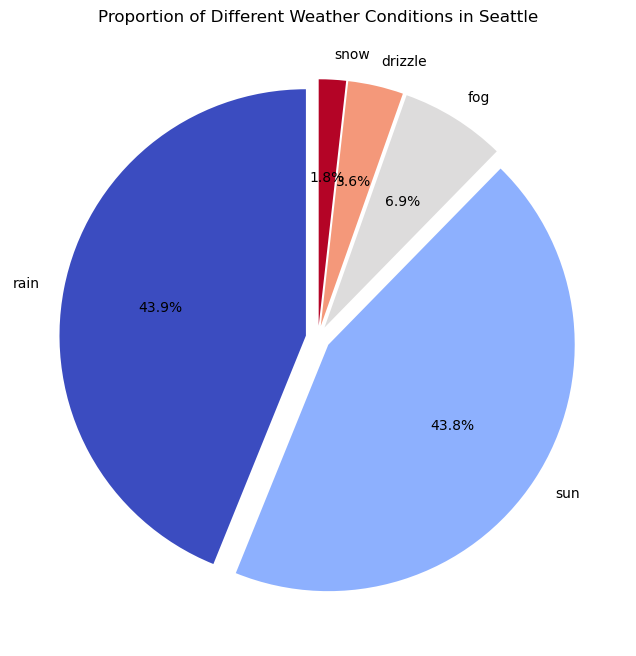

In [12]:
# Frequency of Weather Conditions (Pie Chart) - percentage
plt.figure(figsize=(8, 8))
weather_seattle_df['weather'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    cmap="coolwarm", 
    startangle=90, 
    explode=[0.05]*weather_seattle_df['weather'].nunique())
plt.title("Proportion of Different Weather Conditions in Seattle")
plt.ylabel("")  # Hide y-label for clarity
plt.show()

In [13]:
# Weather Conditions by Month
# Convert 'date' column to datetime format
weather_seattle_df['date'] = pd.to_datetime(weather_seattle_df['date'])

# Extract month number and name
weather_seattle_df['month_number'] = weather_seattle_df['date'].dt.month  # Extract month number
weather_seattle_df['month_name'] = weather_seattle_df['date'].dt.strftime('%B')  # Extract full month name

# Display the first few rows to verify
print(weather_seattle_df[['date', 'month_number', 'month_name']])


           date  month_number month_name
0    2012-01-01             1    January
1    2012-01-02             1    January
2    2012-01-03             1    January
3    2012-01-04             1    January
4    2012-01-05             1    January
...         ...           ...        ...
1456 2015-12-27            12   December
1457 2015-12-28            12   December
1458 2015-12-29            12   December
1459 2015-12-30            12   December
1460 2015-12-31            12   December

[1461 rows x 3 columns]


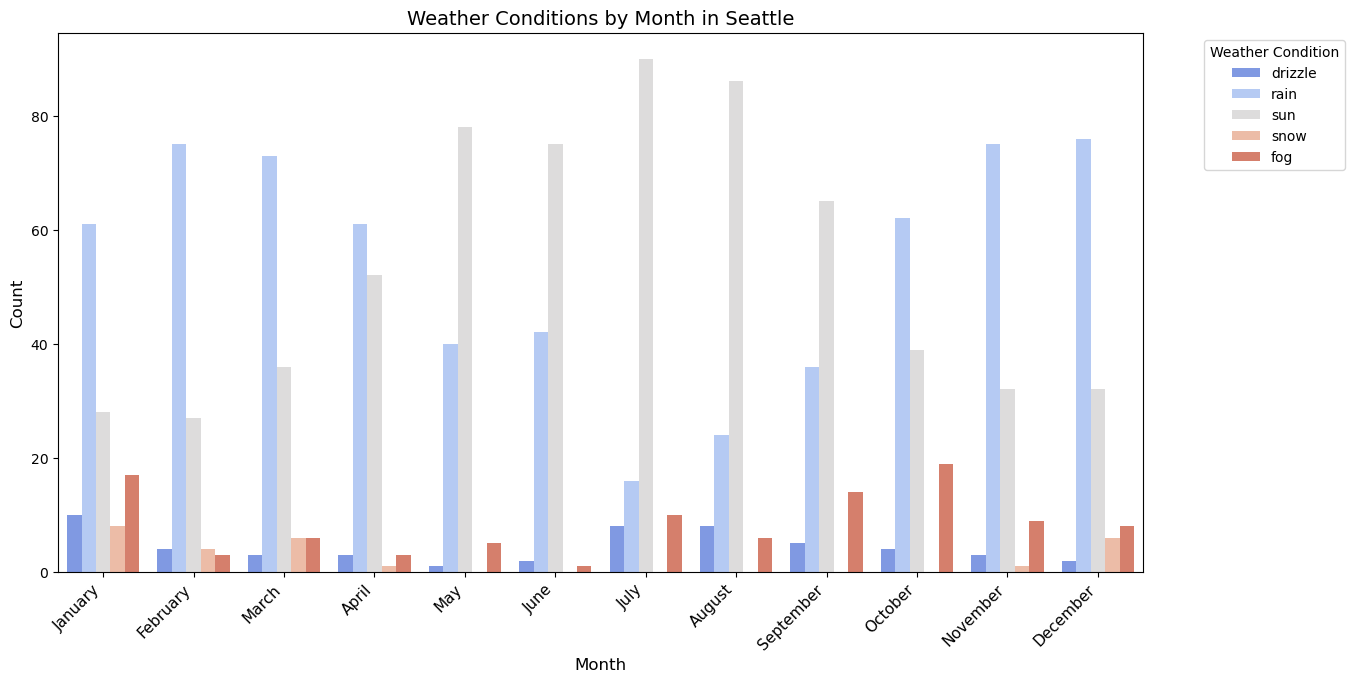

In [14]:
#weather condition by month

# Set figure size
plt.figure(figsize=(14, 7))

# Plot with adjusted bar width and spacing
sns.countplot(x=weather_seattle_df['month_name'], 
              hue=weather_seattle_df['weather'], 
              palette="coolwarm",
              dodge=True,  # Ensures better spacing for grouped bars
              width=0.8)  # Adjust bar width to make them bigger

# Improve title and labels
plt.title("Weather Conditions by Month in Seattle", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjust x-axis spacing for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)  # Rotate and adjust font size for clarity

# Adjust legend position
plt.legend(title="Weather Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.show()

/var/folders/l7/887zj8mx41s138tnzc8jfx0c0000gn/T/ipykernel_88810/1362417499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_seattle_df['weather'], y=weather_seattle_df['wind'], palette="coolwarm")


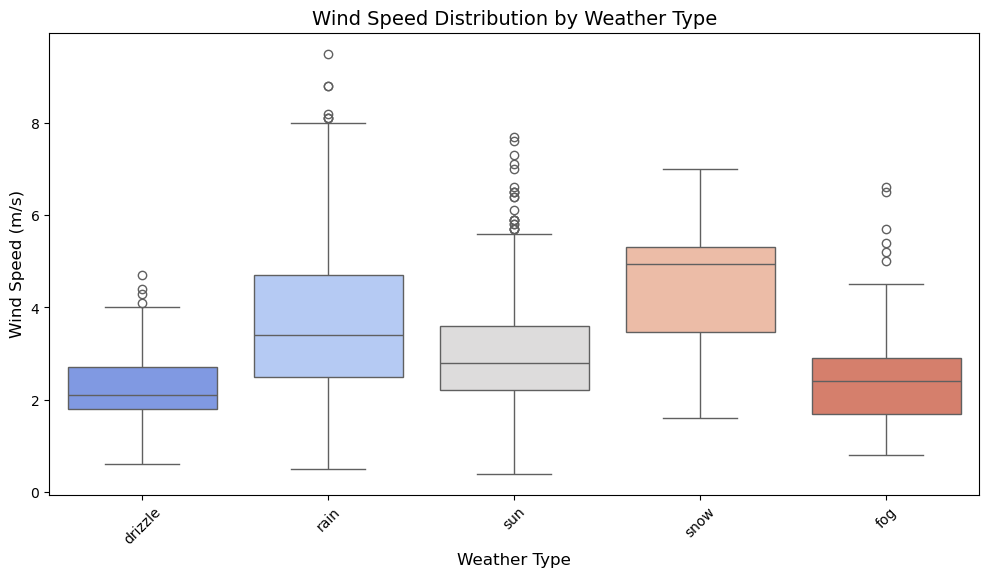

In [15]:

# --- Box Plot: Wind Speed Distribution by Weather Type ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=weather_seattle_df['weather'], y=weather_seattle_df['wind'], palette="coolwarm")
plt.title("Wind Speed Distribution by Weather Type", fontsize=14)
plt.xlabel("Weather Type", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


### Seasonal Analysis

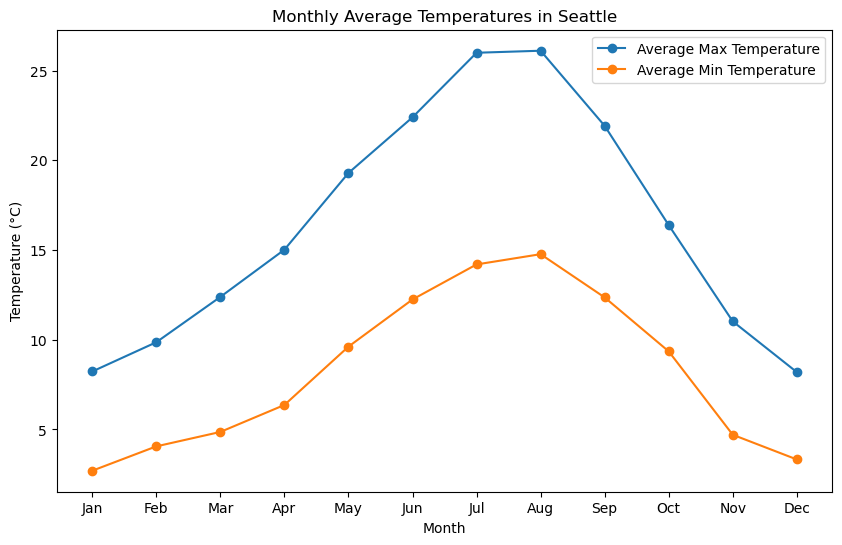

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'month' column exists (numeric format)
weather_seattle_df['month'] = weather_seattle_df['date'].dt.month  # Extracts month as a number

# Group by month (numeric) and calculate averages
monthly_avg_temps = weather_seattle_df.groupby('month')[['temp_max', 'temp_min']].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temps.index, monthly_avg_temps['temp_max'], label='Average Max Temperature', marker='o')
plt.plot(monthly_avg_temps.index, monthly_avg_temps['temp_min'], label='Average Min Temperature', marker='o')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperatures in Seattle')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

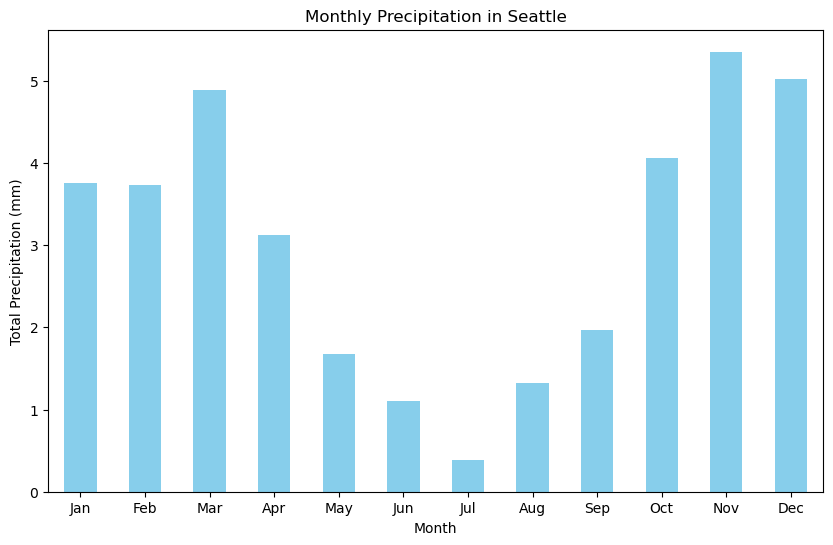

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'month' column exists
weather_seattle_df['month'] = weather_seattle_df['date'].dt.month  # Extracts numeric month (1-12)

# Group by month and calculate average precipitation
monthly_precip = weather_seattle_df.groupby('month')['precipitation'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_precip.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.title('Monthly Precipitation in Seattle')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

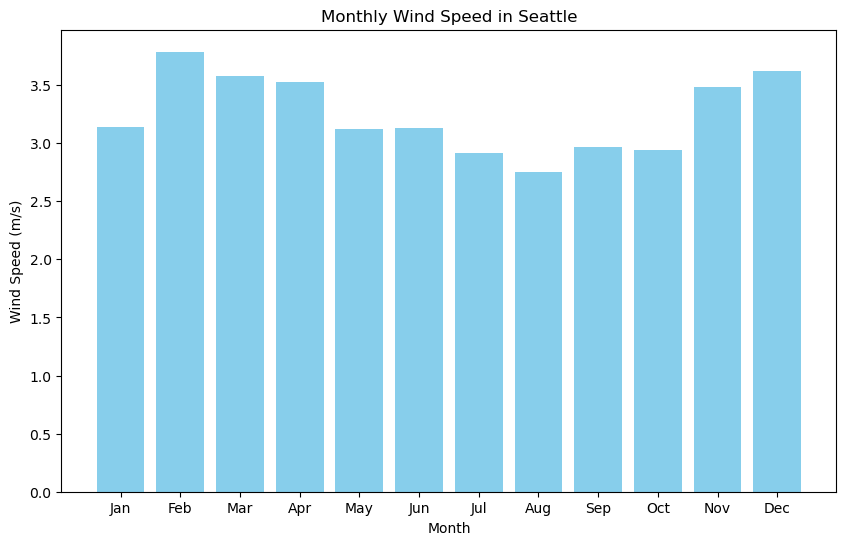

In [18]:

# Ensure 'month' column exists as a numeric value (1-12)
weather_seattle_df['month'] = weather_seattle_df['date'].dt.month

# Group by month and calculate average wind speed
monthly_wind = weather_seattle_df.groupby('month')['wind'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_wind.index, monthly_wind, color='skyblue')

# Formatting
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Monthly Wind Speed in Seattle')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Display the plot
plt.show()

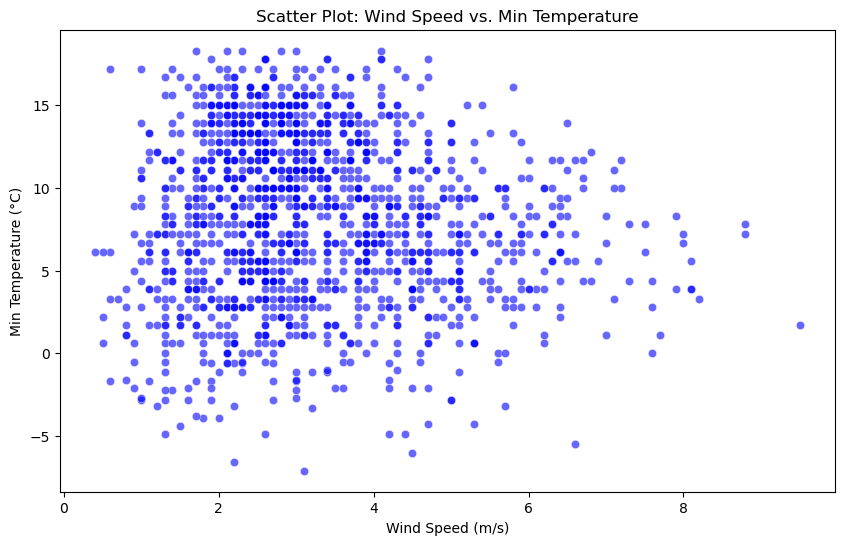

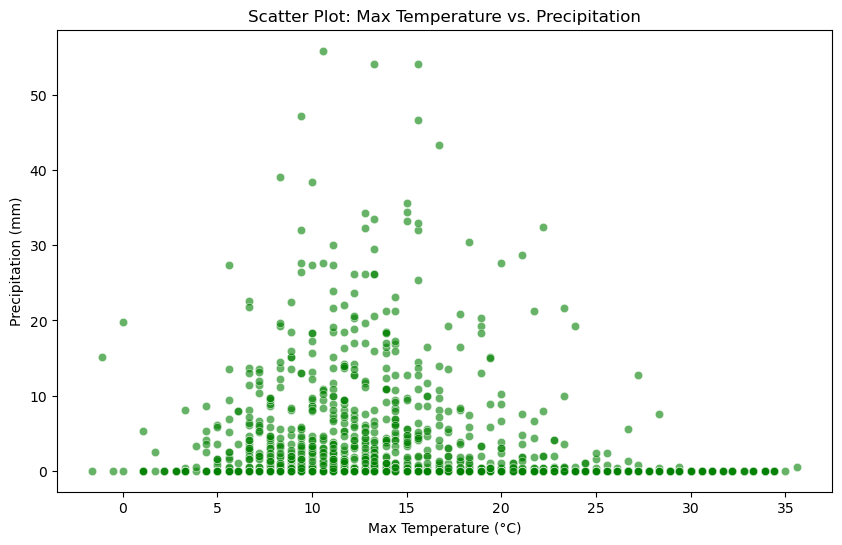

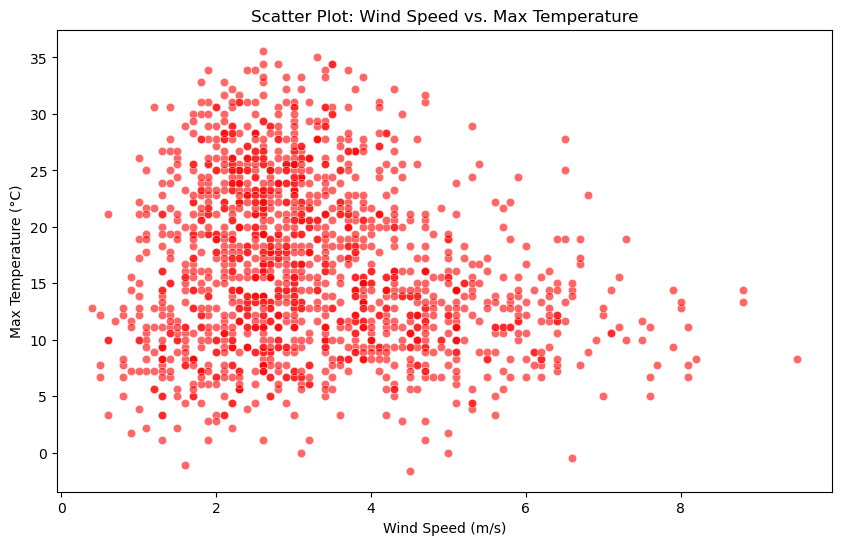

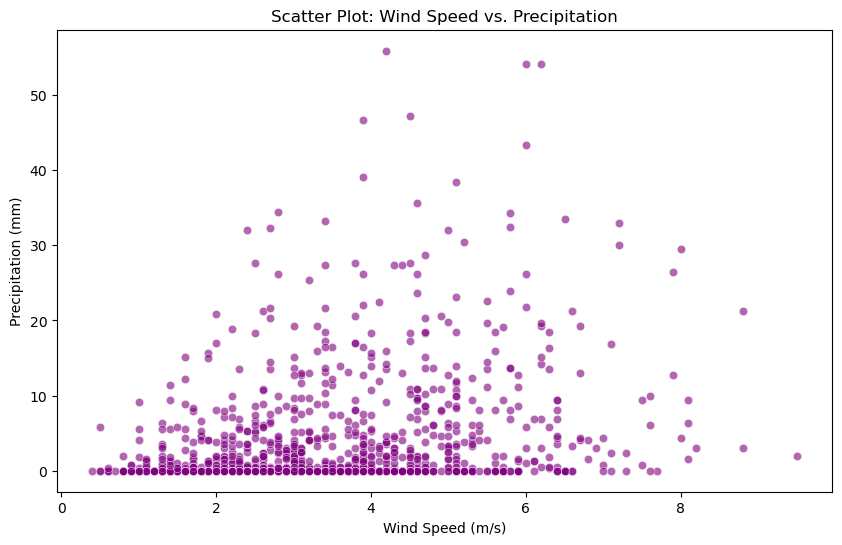

In [19]:
# Use scatter plots to visualize relationships between variables

# --- Scatter Plot: Temperature vs. Humidity ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['wind'], y=weather_seattle_df['temp_min'], color='blue', alpha=0.6)
plt.title("Scatter Plot: Wind Speed vs. Min Temperature")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Min Temperature (°C)")
plt.show()

# --- Scatter Plot: Temperature vs. Precipitation ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['temp_max'], y=weather_seattle_df['precipitation'], color='green', alpha=0.6)
plt.title("Scatter Plot: Max Temperature vs. Precipitation")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.show()

# --- Scatter Plot: Wind Speed vs. Temperature ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['wind'], y=weather_seattle_df['temp_max'], color='red', alpha=0.6)
plt.title("Scatter Plot: Wind Speed vs. Max Temperature")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Max Temperature (°C)")
plt.show()

# --- Scatter Plot: Wind Speed vs. Precipitation ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['wind'], y=weather_seattle_df['precipitation'], color='purple', alpha=0.6)
plt.title("Scatter Plot: Wind Speed vs. Precipitation")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Precipitation (mm)")
plt.show()


In [20]:
#to see the unique year
# Convert to datetime
weather_seattle_df['date'] = pd.to_datetime(weather_seattle_df['date'])

# Extract unique years
unique_years = weather_seattle_df['date'].dt.year.unique()

# Display result
print(unique_years)

[2012 2013 2014 2015]


In [21]:
#to see the unique month
# Convert to datetime
weather_seattle_df['date'] = pd.to_datetime(weather_seattle_df['date'])

# Extract unique years
unique_month = weather_seattle_df['date'].dt.month.unique()

# Display result
print(unique_month)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


### Gita Random Forest Classification

In [22]:
# Import initial libraries
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Load the dataset
file_path = "seattle-weather.csv"
seattle_weather = pd.read_csv(file_path)
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [24]:
# Convert 'date' column to datetime format
seattle_weather['date'] = pd.to_datetime(seattle_weather['date'])

# Extract month and day as numerical features
seattle_weather['month'] = seattle_weather['date'].dt.month
seattle_weather['day'] = seattle_weather['date'].dt.day

seattle_weather.info()
seattle_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   month          1461 non-null   int32         
 7   day            1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(1)
memory usage: 80.0+ KB


,date,precipitation,temp_max,temp_min,wind,weather,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5


In [25]:
# Define features (X) and target variable (y)
X = seattle_weather[['precipitation', 'temp_max', 'temp_min', 'wind', 'month', 'day']]
y = seattle_weather['weather']

In [26]:
# splitting the data into training and testing (by default : training 75%, testing 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting the Random Forest Model

In [28]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

In [30]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [31]:
# Display the classification report
print("Classification Report:\n", class_report)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=rf_classifier.classes_, columns=rf_classifier.classes_))

# Print Accuracy Score
print(f"\nAccuracy Score: {accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

     drizzle       0.33      0.08      0.12        13
         fog       0.40      0.16      0.23        25
        rain       0.97      0.89      0.93       161
        snow       1.00      0.29      0.44         7
         sun       0.76      0.96      0.85       160

    accuracy                           0.83       366
   macro avg       0.69      0.47      0.51       366
weighted avg       0.81      0.83      0.81       366


Confusion Matrix:
         drizzle  fog  rain  snow  sun
drizzle        1    1     0     0   11
fog            0    4     0     0   21
rain           0    0   144     0   17
snow           0    0     5     2    0
sun            2    5     0     0  153

Accuracy Score: 0.83


In [32]:
seattle_weather['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

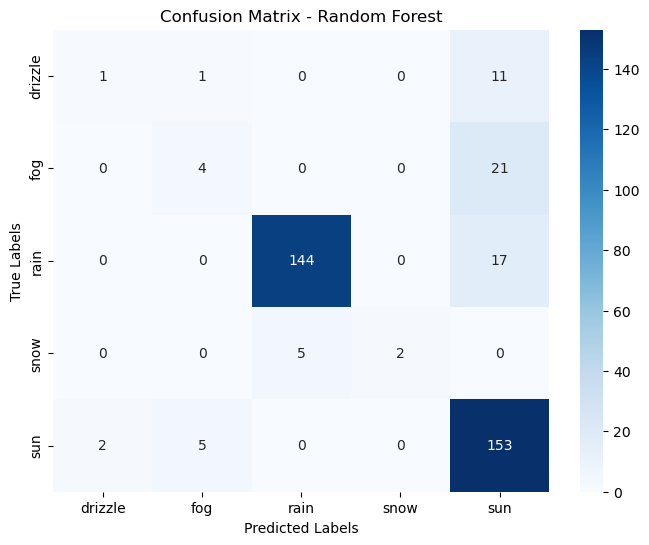

In [33]:
# Create the heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, fmt='d', 
            cmap='Blues', 
            xticklabels=rf_classifier.classes_, 
            yticklabels=rf_classifier.classes_)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Analysis

### Classification Report

The classification report provides key metrics that summarize the model’s performance across different weather conditions.

* Precision : % of predicted positive cases that are actually correct (TP / (TP + FP))
* Recall (Sensitivity) : % of actual positive cases correctly identified (TP / (TP + FN))
* F1-Score : Harmonic mean of precision & recall (2 × (Precision × Recall) / (Precision + Recall))
* Support : Number of true instances per class
    
Interpretation based on the data :

Rain: Precision = 0.97, Recall = 0.89, F1-Score = 0.93
    * The model correctly classifies rainy days 97% of the time (Precision).
    * It captures 89% of actual rainy days (Recall).
    * F1-score of 0.93 shows overall strong performance.

Drizzle: Precision = 0.33, Recall = 0.08, F1-score = 0.12
    * The model struggles to classify drizzle, it might be many drizzle days are misclassified.
    * This suggests that drizzle is hard to differentiate from other conditions.


### Confusion Matrix

The confusion matrix provides insights into how well the model classifies different weather conditions. 
It shows the number of correct and incorrect predictions.

Each row represents the actual class, and each column represents the predicted class.

* True Positives (TP): Correctly predicted weather conditions.
* False Positives (FP): Incorrectly predicted weather conditions.
* False Negatives (FN): Missed predictions where the actual label was different.
* True Negatives (TN): Correctly rejected labels.

Interpretation based on the data :

If Rain has 144 in its row under the Rain column, it means 144 rainy days were correctly classified.
If Rain has 17 under Sun, it means 17 rainy days were misclassified as sunny days.


### Accuracy Score

Accuracy Score = 0.83 (83%)
Meaning: The model correctly predicts 83% of weather conditions.
Limitation: Accuracy does not consider class imbalance (some weather types might be rare).
    

    
### Conclusion

* Rainy and Sunny days are well-classified, based on high precision and recall.
* Drizzle and Fog show weaker performance, meaning they might need more feature engineering.
* Improvement Suggestions:
    * Use more features (e.g., humidity, pressure) to differentiate conditions.
    * Use a balanced dataset to improve classification of rare weather types.
    * Retrieve more data using open API (e.g., Open Weather Data)

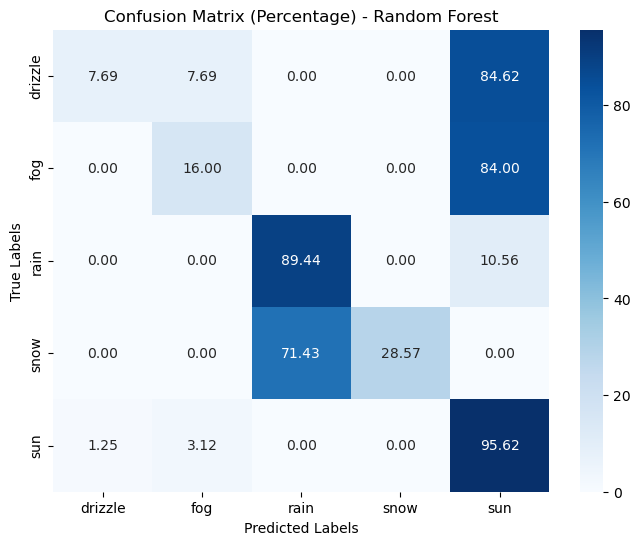

In [34]:
import numpy as np

# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap for percentage-based confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, 
            annot=True, fmt=".2f",  # Show percentages with two decimal places
            cmap='Blues', 
            xticklabels=rf_classifier.classes_, 
            yticklabels=rf_classifier.classes_)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage) - Random Forest')
plt.show()

#### How to Interpret the Heatmap?

* Diagonal values (e.g., Rain → Rain, Sun → Sun) should be high (correct classifications).
* Off-diagonal values (e.g., Snow misclassified as Rain) indicate misclassifications.
* The higher the percentage in a cell, the more frequently the model makes that prediction for that actual class.

####  Interpretation:

* “Sun → Sun” = 95.62% → The model correctly predicts sunny weather 95.62% of the time.
* “Snow → Rain” = 71.43% → The model misclassifies 71.43% of snowy days as rainy.
* “Drizzle → Sun” = 84.62% → Most drizzle days are incorrectly classified as sunny.

### Cat Section

In [35]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Examining dataset
weather_df = pd.read_csv("pp_weather.csv")
weather_df.head(10)

,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0
1,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0
2,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0
3,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0
4,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0
5,2.5,4.4,2.2,2.2,1,2012,6,4,0,0,1,0,0
6,0.0,7.2,2.8,2.3,1,2012,7,5,0,0,1,0,0
7,0.0,10.0,2.8,2.0,1,2012,8,6,0,0,0,0,1
8,4.3,9.4,5.0,3.4,1,2012,9,0,0,0,1,0,0
9,1.0,6.1,0.6,3.4,1,2012,10,1,0,0,1,0,0


In [36]:
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
#scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(weather_df)

In [38]:
#creating elbow plot

inertia = []
k = list(range(1,11))


for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_data)
    inertia.append(k_model.inertia_)

# Create a dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data dictionary
df_elbow = pd.DataFrame(elbow_data)

# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)


:Curve   [k]   (inertia)

In [39]:
 # Create and initialize the K-means model instance for 2 clusters
model = KMeans(n_clusters=3, random_state=1)
model

KMeans(n_clusters=3, random_state=1)

In [40]:
#fit the data to the instance of the model
model.fit(scaled_data)

KMeans(n_clusters=3, random_state=1)

In [41]:
weather_predict= model.predict(scaled_data)

In [42]:
#creating a copy of the dataframe and adding the predictions

weather_predict_df = weather_df.copy()
weather_predict_df["cluster"] = weather_predict

weather_predict_df.head()

,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun,cluster
0,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0,1
1,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0,2
2,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0,2
3,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0,2
4,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0,2


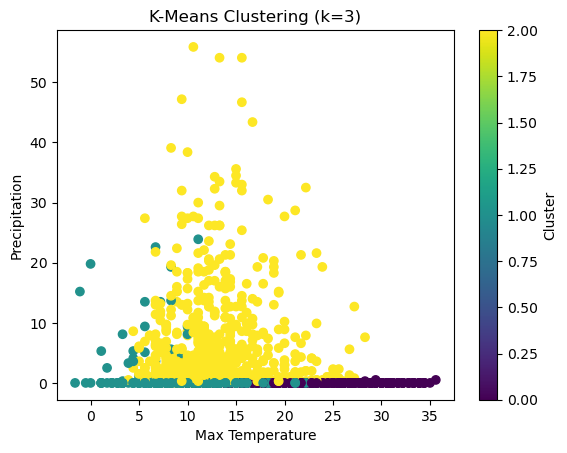

In [43]:
# Plot the clusters
plt.scatter(weather_predict_df['temp_max'], weather_predict_df['precipitation'], c=weather_predict_df['cluster'], cmap='viridis')
plt.xlabel('Max Temperature')
plt.ylabel('Precipitation')
plt.title('K-Means Clustering (k=3)')
plt.colorbar(label='Cluster')
plt.show()

### Cat Logistic Regression Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

In [45]:
#create the y and x values toto predict if its going to rain x independent variables, y dependent
X = weather_df.drop(columns = ["weather_rain", "weather_drizzle", "weather_fog", "weather_snow", "weather_sun"])
y= weather_df["weather_rain"]

In [46]:
#split the data into training and testing sets, splitting it as 75/25 for training testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [47]:
# Initialize the Logistic Regression model
model = LogisticRegression(solver = "lbfgs", max_iter =200, random_state =1)
# Train the model
model

LogisticRegression(max_iter=200, random_state=1)

In [48]:
#fitting the model using the training data
model.fit(X_train, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [49]:
#predictions for the test set 
y_predict= model.predict(X_test)

In [50]:
#score the model using the testing data
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.845662100456621
Testing Data Score: 0.8497267759562842


In [51]:
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,1,0
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


In [52]:
# evaluate the model for weather_rain
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))

Accuracy: 0.8497267759562842
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       208
           1       0.87      0.77      0.81       158

    accuracy                           0.85       366
   macro avg       0.85      0.84      0.84       366
weighted avg       0.85      0.85      0.85       366

Confusion Matrix:
 [[190  18]
 [ 37 121]]


To interpret the confusion matrix
This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted that it would not rain 190 times.
False positives- the model incorrectly predicted that it would rain when there was actually no rain 18 times.
False negatives- the model incorrectly predicted no rain when it actually rained 38 times.
True positives- the model correctly predicted that it rained 120 times.


The model preformed well overall with an accuracy of 84.7%
The dataset is slightly imbalanced with 208 no rain versus 158 rain but the model results are reasonably balanced.
the no rain has precision of 83%, the rain model has a precision of 87%.


In [53]:
def run_logistic_regression(weather_df, target_column):
     #putting the codes from above in this function
    X = weather_df.drop(columns=["weather_rain", "weather_drizzle", "weather_fog", "weather_snow", "weather_sun"])
    y = weather_df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #had to add this otherwise the function does not work
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    model = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=1, class_weight="balanced")
    model.fit(X_train_resampled, y_train_resampled)


    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    clf_report = classification_report(y_test, y_predict)
    conf_matrix = confusion_matrix(y_test, y_predict)


    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(clf_report)
    print("Confusion Matrix:")
    print(conf_matrix)

In [54]:
#try running for another input such as weather_drizzle
run_logistic_regression(weather_df, "weather_drizzle")

Accuracy: 0.7432

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       357
           1       0.06      0.67      0.11         9

    accuracy                           0.74       366
   macro avg       0.53      0.71      0.48       366
weighted avg       0.97      0.74      0.83       366

Confusion Matrix:
[[266  91]
 [  3   6]]


This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted that it will not drizzle 266 times.
False positives- the model incorrectly predicted that it drizzled when it didn't 91 times.
False negatives- the model incorrectly predicted no drizzle when it drizzled 3 times.
True positives- the model correctly predicted that it drizzled 6 times.
Summary

The has an accuracy of 74.3% which is misleadingly high since the model performed extremely well on the no drizzle class but poorly for the drizzle class,
therefore skewing the accuracy results.
The no drizzle model has a high precision of 99% but the no drizzle model has a low precision of 6&.
The model is very imbalanced with 357 no drizzle compared to 8 drizzled, therefore it struggles to predict whether it drizzled or not 


In [55]:
#try running for another input such as weather_fog
run_logistic_regression(weather_df, "weather_fog")

Accuracy: 0.7158

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       338
           1       0.17      0.68      0.27        28

    accuracy                           0.72       366
   macro avg       0.57      0.70      0.55       366
weighted avg       0.90      0.72      0.78       366

Confusion Matrix:
[[243  95]
 [  9  19]]


This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted no fog 243 times.
False positives- the model incorrectly predicted fog 95 times when it was not foggy.
False negatives- the model incorrectly predicted no fog when it was actually foggy 9 times.
True positives- the model correctly predicted fog 19 times.
Summary
The model is very imbalanced with 338 no fog samples and 28 fog samples, therefore it struggles to predict fog accurately and skews the accuracy 
of the model to being higher at 71.5%.
The no fog model has a high precision of 96% and the model for fog has a low precision of 17%.
The model has an accuracy of 71% which is misleadingly high because of the no fog class performing well and skewing the results.


In [56]:
#try running for another input such as weather_snow
run_logistic_regression(weather_df, "weather_snow")

Accuracy: 0.9317

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       362
           1       0.11      0.75      0.19         4

    accuracy                           0.93       366
   macro avg       0.55      0.84      0.58       366
weighted avg       0.99      0.93      0.96       366

Confusion Matrix:
[[338  24]
 [  1   3]]


This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly predicted no snow 338 times.
False positives- the model incorrectly predicted snow when there was no snow 24 times.
False negatives- the model incorrectly predicted no snow when there was actually snow 1 time.
True positives- the model correctly predicted snow 3 times.
Summary
The model is very imbalanced with 362 instances of no snow versus 4 snow days, therefore it struggles to predict snow due to the small sample size.
This imbalance along with the almost perfect precision score of the no snow class skews the accuracy of this model to being extremely high at 93.1%.


In [57]:
#try running for another input such as weather_sun
run_logistic_regression(weather_df, "weather_sun")

Accuracy: 0.8251

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       199
           1       0.75      0.92      0.83       167

    accuracy                           0.83       366
   macro avg       0.84      0.83      0.83       366
weighted avg       0.84      0.83      0.82       366

Confusion Matrix:
[[148  51]
 [ 13 154]]


This matrix shows the counts of true vs. predicted classifications:
True negatives- the model correctly no sun 148 times.
False positives- the model incorrectly sun when there was no sun 51 times.
False negatives- the model incorrectly predicted no sun when there was sun 13 times.
True positives- the model correctly predicted sun 154 times.
Summary
The model is very balanced with 199 no sun versus 167 sun days, therefore it didnt have a bias in prediction. 
